In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt



In [108]:
df = pd.read_csv("SpotifyData.csv")
print(df.head(5))

           artist                    song  duration  year  popularity  \
0  Britney Spears  Oops!...I Did It Again    211160  2000          77   
1       blink-182    All The Small Things    167066  1999          79   
2      Faith Hill                 Breathe    250546  1999          66   
3        Bon Jovi            It's My Life    224493  2000          78   
4          *NSYNC             Bye Bye Bye    200560  2000          65   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.751   0.834    1    -5.444     0       0.0437        0.3000   
1         0.434   0.897    0    -4.918     1       0.0488        0.0103   
2         0.529   0.496    7    -9.007     1       0.0290        0.1730   
3         0.551   0.913    0    -4.063     0       0.0466        0.0263   
4         0.614   0.928    8    -4.806     0       0.0516        0.0408   

   instrumentalness  liveness  valence    tempo  
0          0.000018    0.3550    0.894   95.053  
1         

In [109]:
df2 = df[["duration", "energy", "loudness", "valence", "tempo", "popularity"]]

#converting the miliseconds to seconds
df2['duration'] = df2['duration'] / 1000
#only using popularity values greater than 20
df2= df2[df2['popularity']>20]
df2.describe()

C:\Users\shaan\AppData\Local\Temp\ipykernel_22972\3151603151.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['duration'] = df2['duration'] / 1000


,duration,energy,loudness,valence,tempo,popularity
count,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000
mean,229.953675,0.721867,-5.495205,0.553893,120.158735,65.846916
std,39.528642,0.152242,1.944991,0.220435,27.187386,10.607587
min,113.000000,0.054900,-20.514000,0.040600,60.019000,21.000000
25%,204.689500,0.625000,-6.483250,0.392750,98.040000,59.000000
50%,224.239500,0.737500,-5.270000,0.560000,120.018000,67.000000
75%,250.393000,0.840250,-4.145500,0.733000,135.096000,74.000000
max,484.146000,0.999000,-0.276000,0.973000,210.851000,89.000000


In [110]:
scaler = MinMaxScaler()
dfmms = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)
print(dfmms)

      duration    energy  loudness   valence     tempo  popularity
0     0.264478  0.825230  0.744639  0.915272  0.232272    0.823529
1     0.145673  0.891961  0.770630  0.690047  0.588118    0.852941
2     0.370598  0.467217  0.568584  0.254612  0.509441    0.661765
3     0.300402  0.908908  0.812877  0.539897  0.397615    0.838235
4     0.235918  0.924796  0.776164  0.899185  0.746771    0.647059
...        ...       ...       ...       ...       ...         ...
1811  0.183286  0.719309  0.763366  0.977477  0.516727    0.852941
1812  0.176281  0.685415  0.731643  0.561347  0.729122    0.838235
1813  0.236007  0.659994  0.586965  0.826255  0.251704    0.705882
1814  0.156351  0.492638  0.642405  0.328614  0.284946    0.794118
1815  0.275579  0.748967  0.840844  0.549550  0.397946    0.941176

[1816 rows x 6 columns]


In [111]:
ogdf = pd.DataFrame(scaler.inverse_transform(dfmms), columns=dfmms.columns)
ogdf

,duration,energy,loudness,valence,tempo,popularity
0,211.160,0.834,-5.444,0.894,95.053,77.0
1,167.066,0.897,-4.918,0.684,148.726,79.0
2,250.546,0.496,-9.007,0.278,136.859,66.0
3,224.493,0.913,-4.063,0.544,119.992,78.0
4,200.560,0.928,-4.806,0.879,172.656,65.0
...,...,...,...,...,...,...
1811,181.026,0.734,-5.065,0.952,137.958,79.0
1812,178.426,0.702,-5.707,0.564,169.994,78.0
1813,200.593,0.678,-8.635,0.811,97.984,69.0
1814,171.029,0.520,-7.513,0.347,102.998,75.0


In [112]:
X = df2[["duration", "energy", "loudness", "valence", "tempo"]].values
y = df2['popularity'].values

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(len(X_train))

1271


In [114]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [1]:
y_pred = model.predict(X_test)
print(y_pred[1])

print(y_test[1])

NameError: name 'model' is not defined

In [116]:
ytest_list = y_test.tolist()
ypred_list = y_pred.tolist()

print(ytest_list[:100])

[80, 73, 50, 72, 75, 84, 81, 66, 59, 65, 58, 48, 60, 78, 75, 81, 52, 81, 52, 78, 67, 60, 72, 59, 63, 57, 79, 48, 69, 78, 57, 77, 63, 64, 66, 56, 49, 73, 68, 52, 77, 81, 59, 77, 76, 76, 70, 69, 76, 53, 53, 71, 80, 79, 79, 71, 71, 70, 70, 66, 65, 73, 76, 47, 65, 49, 77, 66, 68, 61, 78, 63, 81, 66, 62, 80, 68, 84, 54, 62, 82, 61, 69, 59, 55, 65, 79, 43, 74, 68, 76, 66, 60, 81, 51, 51, 63, 57, 63, 73]


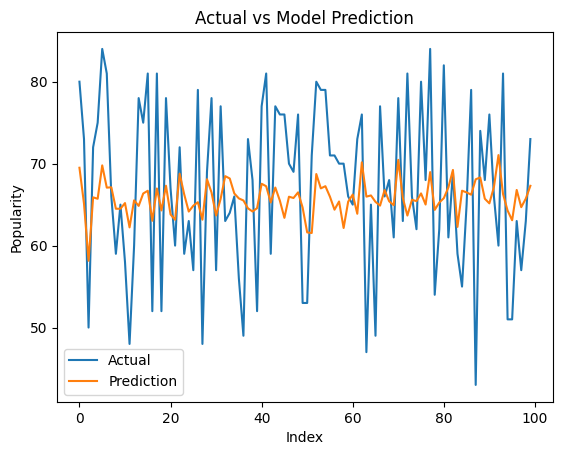

In [122]:


plt.plot([x for x in range(100)], ytest_list[:100], label='Actual')
plt.plot([x for x in range(100)], ypred_list[:100], label='Prediction')
plt.xlabel('Index')
plt.ylabel('Popularity')
plt.title('Actual vs Model Prediction')

plt.legend()
plt.show()

In [117]:
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error: ', mse)

Mean squared error:  110.49461118054872
